# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

Text(0.5, 1.0, 'RGB')

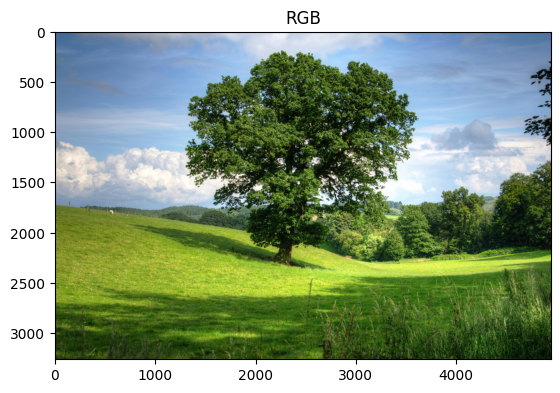

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img_bgr=cv2.imread("image.jpg")
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB) #used to convert of rgb
#plt.imshow(img_bgr)
plt.imshow(img_rgb)
plt.title("RGB")

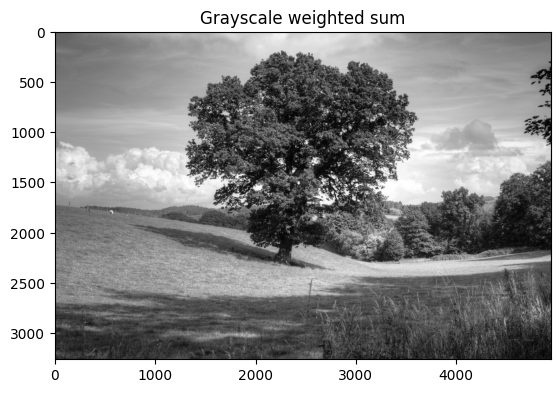

In [ ]:
weights = np.array([0.299,0.587,0.114])
gray_weighted=np.dot(img_rgb[...,:3], weights).astype(np.uint8)
plt.imshow(gray_weighted,cmap='gray')
plt.title("Grayscale weighted sum")
plt.show()

Text(0.5, 1.0, 'Grayscale')

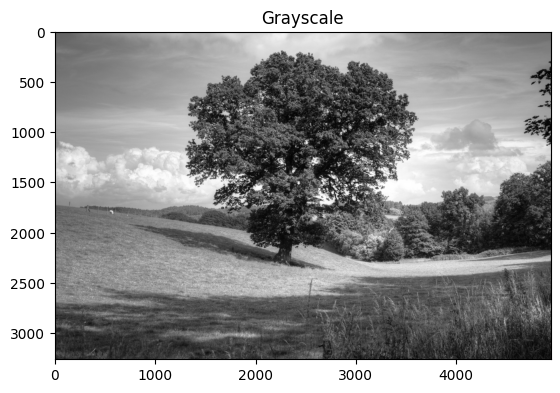

In [ ]:
gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')
plt.title("Grayscale")

In [ ]:
print(f"Array shape of rgb:{img_rgb.shape}")
print(f"Array shape of grayscale weighted sum:{gray_weighted.shape}")
print(f"Array shape of grayscale:{gray.shape}")

Array shape of rgb:(3263, 4944, 3)
Array shape of grayscale weighted sum:(3263, 4944)
Array shape of grayscale:(3263, 4944)


In [ ]:
sample_row = 100
sample_col = 150
rgb_pixel = img_rgb[sample_row,sample_col]
print(f"rgb pixel value at({sample_row},{sample_col}):{rgb_pixel}")
gray_pixel=gray[sample_row,sample_col]
print(f"Grayscale pixel value at({sample_row},{sample_col}):{gray_pixel}")
r,g,b=rgb_pixel
calculated_value=(0.299*r)+(0.587*g)+(0.114*b)
print(f"Weighted sum calculation for this pixel)={calculated_value:.2f}")

rgb pixel value at(100,150):[ 79 114 154]
Grayscale pixel value at(100,150):108
Weighted sum calculation for this pixel)=108.09


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [ ]:
gray_float=gray.astype(np.float32)
f=np.fft.fft2(gray_float)
f_shift=np.fft.fftshift(f)

Text(0.5, 1.0, 'Magnitude spectrum')

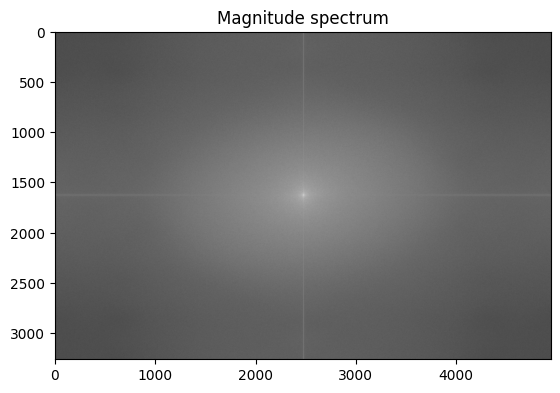

In [ ]:
magnitude=20*np.log(np.abs(f_shift)+1)
phase=np.angle(f_shift)
plt.imshow(magnitude,cmap='gray')
plt.title("Magnitude spectrum")

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

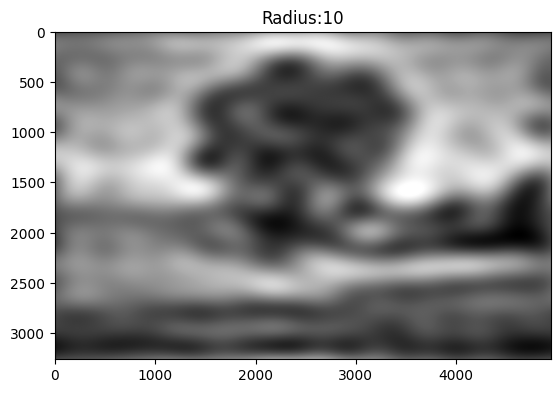

In [ ]:
rows,cols=gray.shape
crow,ccol=rows//2,cols//2
radius=10
mask_lpf=np.zeros((rows,cols),np.uint8)
cv2.circle(mask_lpf,(ccol,crow),radius,1,-1)
f_lpf=f_shift*mask_lpf
f_ishift=np.fft.ifftshift(f_lpf)
img_back=np.fft.ifft2(f_ishift)
img_back_normalized=np.clip(np.abs(img_back),0,255).astype(np.uint8)
plt.imshow(img_back_normalized,cmap='gray')
plt.title("Radius:10")
plt.show()

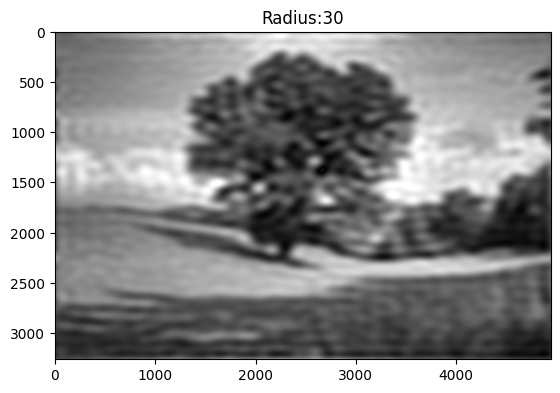

In [ ]:
rows,cols=gray.shape
crow,ccol=rows//2,cols//2
radius=30
mask_lpf=np.zeros((rows,cols),np.uint8)
cv2.circle(mask_lpf,(ccol,crow),radius,1,-1)
f_lpf=f_shift*mask_lpf
f_ishift=np.fft.ifftshift(f_lpf)
img_back=np.fft.ifft2(f_ishift)
img_back_normalized=np.clip(np.abs(img_back),0,255).astype(np.uint8)
plt.imshow(img_back_normalized,cmap='gray')
plt.title("Radius:30")
plt.show()

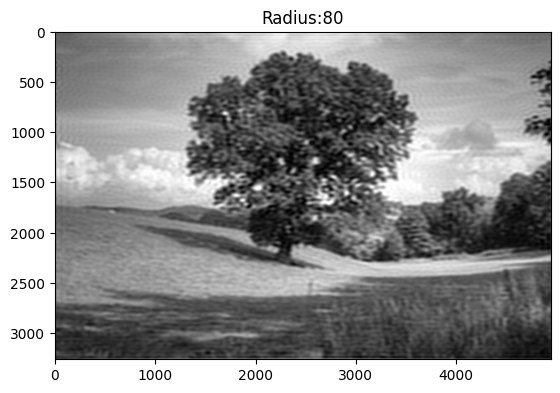

In [ ]:
rows,cols=gray.shape
crow,ccol=rows//2,cols//2
radius=80
mask_lpf=np.zeros((rows,cols),np.uint8)
cv2.circle(mask_lpf,(ccol,crow),radius,1,-1)
f_lpf=f_shift*mask_lpf
f_ishift=np.fft.ifftshift(f_lpf)
img_back=np.fft.ifft2(f_ishift)
img_back_normalized=np.clip(np.abs(img_back),0,255).astype(np.uint8)
plt.imshow(img_back_normalized,cmap='gray')
plt.title("Radius:80")
plt.show()

In [ ]:
#The inverse relationship is caused because Low-Pass Filtering removes high-frequency components i.e image detail/edges and a smaller radius removes more of these high frequencies,leading to greater blurring.

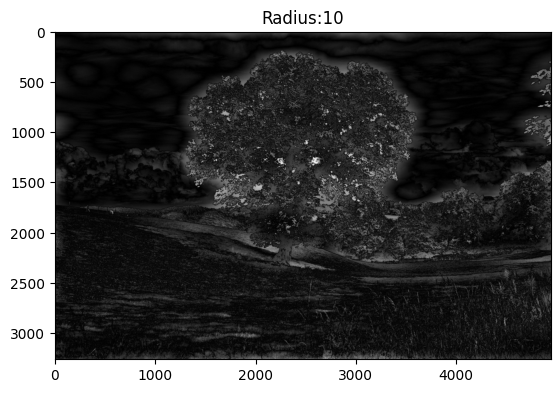

In [ ]:
rows,cols=gray.shape
crow,ccol=rows//2,cols//2
radius=10
mask_lpf=np.zeros((rows,cols),dtype=np.float32)
cv2.circle(mask_lpf,(ccol,crow),radius,1.0,-1)
mask_hpf=1.0-mask_lpf
f_hpf=f_shift*mask_hpf
f_ishift=np.fft.ifftshift(f_hpf)
img_back=np.fft.ifft2(f_ishift)
img_back_abs=np.abs(img_back)
img_back_normalized=(img_back_abs-img_back_abs.min())/(img_back_abs.max()-img_back_abs.min())
img_back_normalized=(img_back_normalized*255).astype(np.uint8)
plt.imshow(img_back_normalized,cmap='gray')
plt.title("Radius:10")
plt.show()

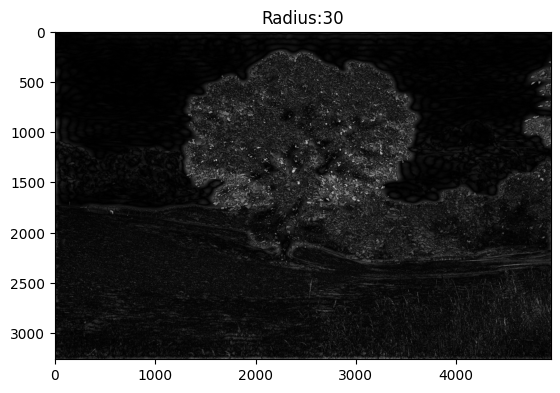

In [ ]:
rows,cols=gray.shape
crow,ccol=rows//2,cols//2
radius=30
mask_lpf=np.zeros((rows,cols),dtype=np.float32)
cv2.circle(mask_lpf,(ccol,crow),radius,1.0,-1)
mask_hpf=1.0-mask_lpf
f_hpf=f_shift*mask_hpf
f_ishift=np.fft.ifftshift(f_hpf)
img_back=np.fft.ifft2(f_ishift)
img_back_abs=np.abs(img_back)
img_back_normalized=(img_back_abs-img_back_abs.min())/(img_back_abs.max()-img_back_abs.min())
img_back_normalized=(img_back_normalized*255).astype(np.uint8)
plt.imshow(img_back_normalized,cmap='gray')
plt.title("Radius:30")
plt.show()

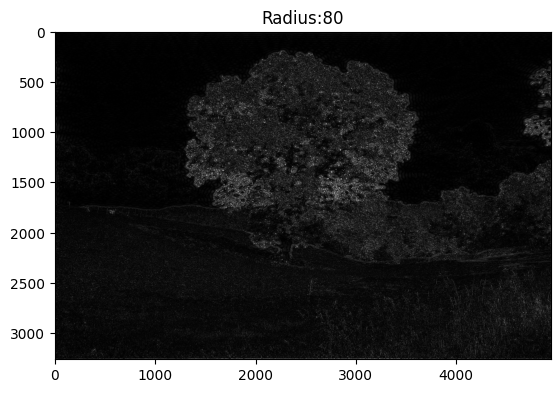

In [ ]:
rows,cols=gray.shape
crow,ccol=rows//2,cols//2
radius=80
mask_lpf=np.zeros((rows,cols),dtype=np.float32)
cv2.circle(mask_lpf,(ccol,crow),radius,1.0,-1)
mask_hpf=1.0-mask_lpf
f_hpf=f_shift*mask_hpf
f_ishift=np.fft.ifftshift(f_hpf)
img_back=np.fft.ifft2(f_ishift)
img_back_abs=np.abs(img_back)
img_back_normalized=(img_back_abs-img_back_abs.min())/(img_back_abs.max()-img_back_abs.min())
img_back_normalized=(img_back_normalized*255).astype(np.uint8)
plt.imshow(img_back_normalized,cmap='gray')
plt.title("Radius:80")
plt.show()

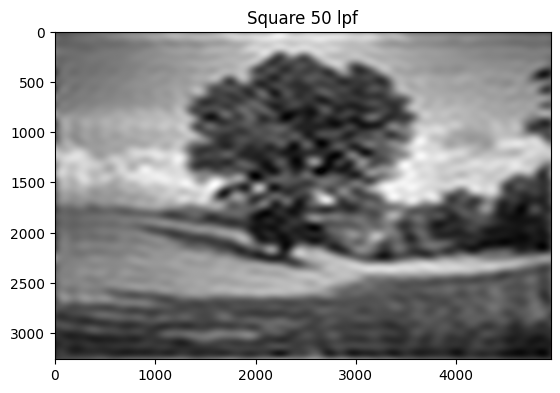

In [ ]:
side=50
half_side=side//2
r_start=crow-half_side
r_end=crow+half_side
c_start=ccol-half_side
c_end=ccol+half_side
mask_square=np.zeros((rows, cols),dtype=np.float32)
mask_square[r_start:r_end, c_start:c_end]=1.0
f_shift_filtered=f_shift*mask_square
f_ishift=np.fft.ifftshift(f_shift_filtered)
img_back=np.fft.ifft2(f_ishift)
img_back_abs=np.abs(img_back)
img_back_normalized=(img_back_abs-img_back_abs.min())/(img_back_abs.max()-img_back_abs.min())
img_back_normalized=(img_back_normalized*255).astype(np.uint8)
plt.imshow(img_back_normalized,cmap='gray')
plt.title("Square 50 lpf")
plt.show()

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

Text(0.5, 1.0, 'Phase only reconstruction')

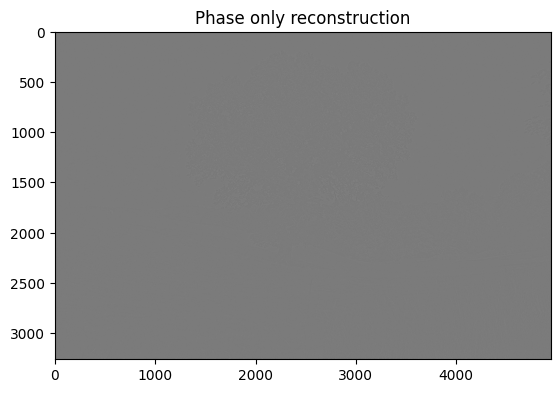

In [ ]:
phase_only=f_shift/np.abs(f_shift)
f_ishift_phase=np.fft.ifftshift(phase_only)
img_phase_recon=np.fft.ifft2(f_ishift_phase)
img_phase_recon=np.real(img_phase_recon)
plt.imshow(img_phase_recon,cmap='gray')
plt.title('Phase only reconstruction')

Text(0.5, 1.0, 'Reconstruction from np.angle(f_shift)')

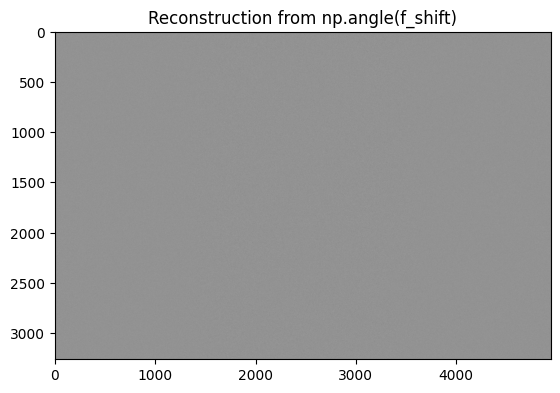

In [ ]:
f_ishift_angle=np.fft.ifftshift(np.angle(f_shift))
img_angle_recon=np.fft.ifft2(f_ishift_angle)
img_angle_recon=np.real(img_angle_recon)
plt.imshow(img_angle_recon,cmap='gray')
plt.title('Reconstruction from np.angle(f_shift)')

Text(0.5, 1.0, 'Magnitude only reconstruction')

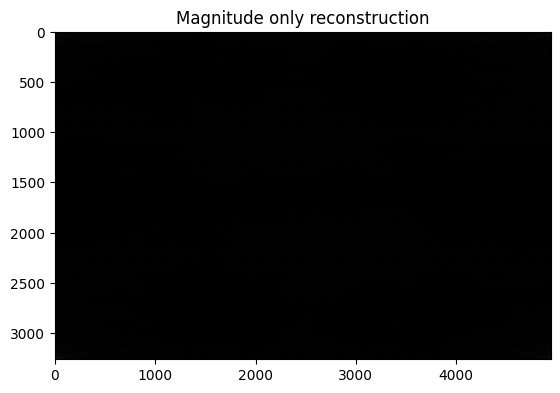

In [ ]:
mag_only=np.abs(f_shift)
mag_complex=mag_only.astype(complex)
f_ishift_mag=np.fft.ifftshift(mag_complex)
img_mag_recon=np.fft.ifft2(f_ishift_mag)
img_mag_recon=np.real(img_mag_recon)
img_mag_recon_normalized=(img_mag_recon-np.min(img_mag_recon))/(np.max(img_mag_recon)-np.min(img_mag_recon))
plt.imshow(img_mag_recon_normalized,cmap='gray')
plt.title('Magnitude only reconstruction')

In [ ]:
#Logarithm is used to compress the dynamic range of the magnitude values
#The difference between the logarithmic and normal magnitude spectrum visualization is caused by the need to compress the high dynamic range of the magnitude values to make small,high-frequency components visible alongside large,low-frequency components .

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

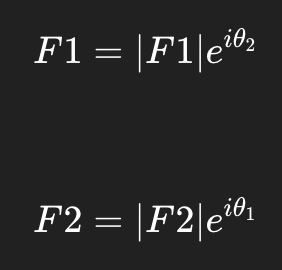

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.